# Netflix Churn Analysis Prediction

In [6]:
# import the needed Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# Load the dataset
netflix_data = pd.read_csv('netflix_customer_churn.csv')

# Display dataset shape 
netflix_data.shape

(5000, 14)

In [8]:
# Display the first few rows of the dataset
netflix_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [9]:
# Show data info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [10]:
print(netflix_data.shape)

(5000, 14)


In [11]:
# check for missing values
netflix_data.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [12]:
# Convert churned column to Yes/No
netflix_data['churned'] = netflix_data['churned'].map({1: "Yes", 0: "No"})

# Drop the customer_id column 
netflix_data = netflix_data.drop("customer_id", axis=1)

# Check the updated column
print(netflix_data['churned'].value_counts())
netflix_data.head()


churned
Yes    2515
No     2485
Name: count, dtype: int64


,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,Yes,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,Yes,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,No,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,Yes,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,Yes,Crypto,2,0.13,Action


# Exploratory Data Analysis

C:\Users\Luis Joshua\AppData\Local\Temp\ipykernel_15668\2411708775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='churned', palette='Set2')


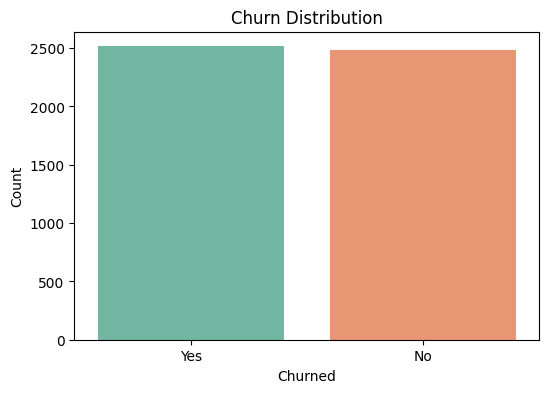

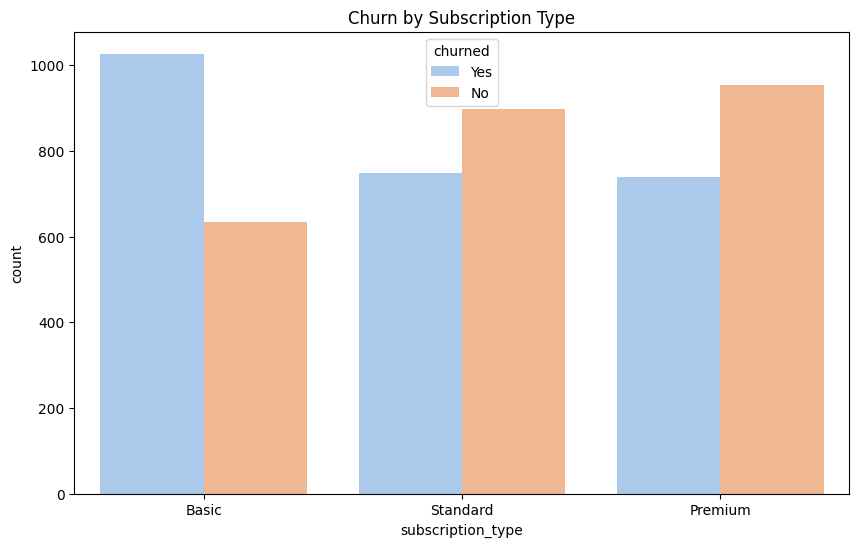

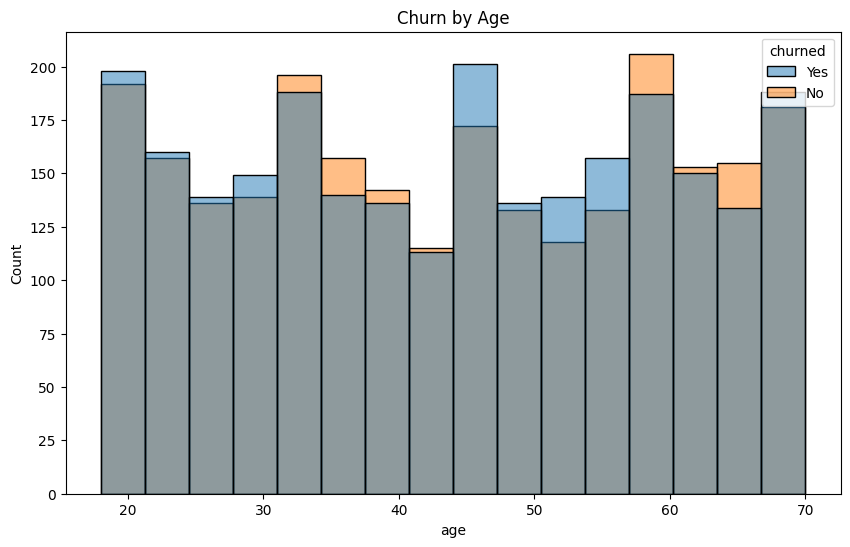

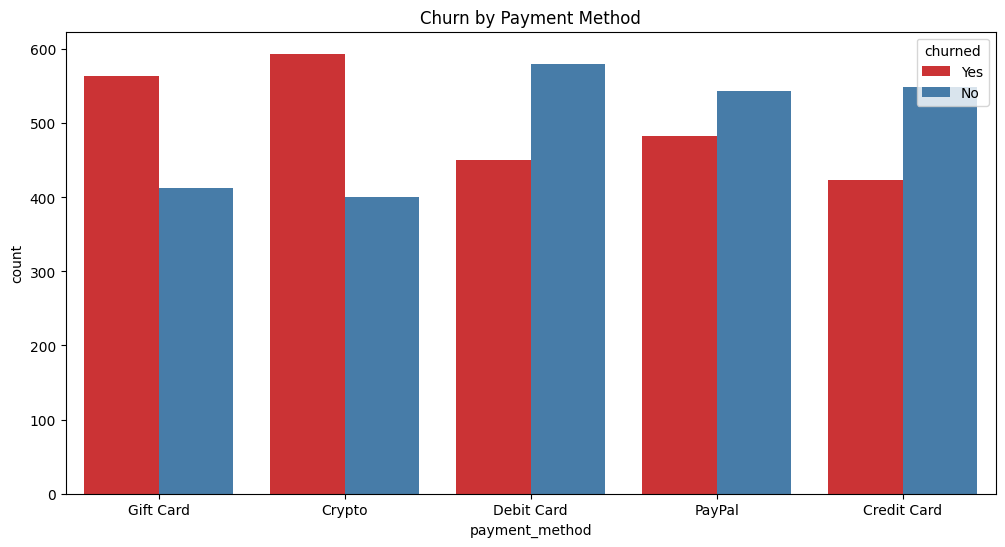

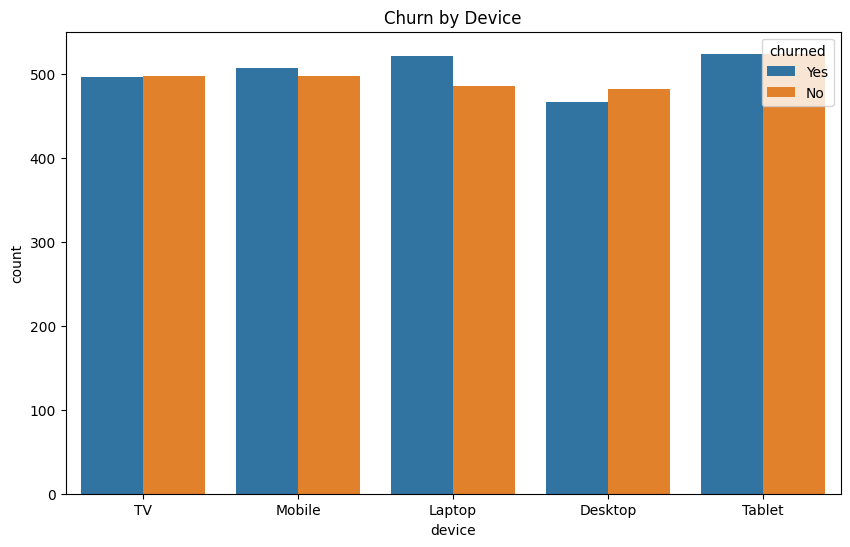

In [13]:
# Show the Churn distribution with percentages
plt.figure(figsize=(6,4))
sns.countplot(data=netflix_data, x='churned', palette='Set2') 
plt.title('Churn Distribution')
plt.ylabel("Count")
plt.xlabel("Churned")
plt.savefig('churn_distribution.png')
plt.show()

# Churn by Subscription Type
plt.figure(figsize=(10,6))
sns.countplot(data=netflix_data, x='subscription_type', hue='churned', palette='pastel')
plt.title('Churn by Subscription Type')
plt.savefig('churn_by_subscription_type.png')
plt.show()

# Churn by age
plt.figure(figsize=(10,6))
sns.histplot(data=netflix_data, x='age', hue='churned')
plt.title('Churn by Age')  
plt.savefig('churn_by_age.png')
plt.show()

# Churn by Payment Method
plt.figure(figsize=(12,6)) 
sns.countplot(data=netflix_data, x='payment_method', hue='churned', palette='Set1')
plt.title('Churn by Payment Method')
plt.savefig('churn_by_payment_method.png')
plt.show()

# Churn by Device
plt.figure(figsize=(10,6))
sns.countplot(data=netflix_data, x='device', hue='churned')
plt.title('Churn by Device')
plt.savefig('churn_by_device.png')
plt.show()


# Implementation of LogisticRegression 

In [14]:
# Encode categorical variables except churned
categorical_cols = netflix_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'churned']

netflix_data_encoded = pd.get_dummies(netflix_data, columns=categorical_cols, drop_first=True)

# Define features and target variable
X = netflix_data_encoded.drop('churned', axis=1)
y = netflix_data_encoded['churned']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Save actual vs predicted (Yes/No)
results = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': pd.Series(y_pred).reset_index(drop=True)
})
results.to_csv('churn_predictions.csv', index=False)




Accuracy: 0.90
              precision    recall  f1-score   support

          No       0.91      0.88      0.89       498
         Yes       0.88      0.92      0.90       502

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

